In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
v_{c}^{2} (R) = -\frac{4\pi G\Sigma_{g}}{R_{g}}R^{2}\int_{0}^{1}\frac{ds}{\sqrt{1-s^{2}}}\int_{1}^{\infty}\frac{dh}{\sqrt{h^{2}-1}}e^{-\frac{Rsh}{R_{g}} -\frac{R_{m}}{Rsh}}\left( \frac{R_{m}R_{g}}{R^{2}h^{2}} - s^{2} \right)
\end{equation}$$

In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [3]:
def Integral_ISM(h,s,R,R_g=2.*R_d_I,R_m=R_m):
    t1 = 1./np.sqrt(1.-s**2.)
    t2 = 1./np.sqrt(h**2. - 1.)
    t3 = np.exp(-(R*s*h)/R_g - R_m/(R*h*s))
    t4 = (R_m*R_g)/(R**2.*h**2.) - s**2.
    result = t1*t2*t3*t4
    return R**2.*result

In [4]:
R = np.linspace(0.1,15.,100)

In [5]:
Integral_ISM_res = []
for i in range (0,len(R)):
    integrando = lambda h,s: Integral_ISM(h,s,R[i])
    resultado = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
    Integral_ISM_res.append(resultado)

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


In [6]:
print Integral_ISM_res

[0.002203292281295529, 0.014082320851371932, 0.03759504295291483, 0.0760701038398425, 0.13228641788662418, 0.20456625486873364, 0.28710305728738483, 0.37252468931878174, 0.453909135701367, 0.5257231390165426, 0.5840311653359783, 0.6263506403320546, 0.6513831532663757, 0.6587340993593614, 0.6486662415631078, 0.62189985531089, 0.5794579135771614, 0.5225496892703961, 0.45248517242422237, 0.37061335944367296, 0.27827864332943, 0.17679073222901912, 0.0674045713439839, -0.04869240645756671, -0.17038770462216482, -0.2966473590982393, -0.426516814006589, -0.5591198954342556, -0.6936564886405826, -0.8293993565092829, -0.9656904279858396, -1.1019367747071722, -1.2376064832222078, -1.3722244792596223, -1.5053684493684918, -1.636664880715815, -1.7657852683431574, -1.8924425079746163, -2.0163874974109866, -2.137405937047021, -2.2553153368136383, -2.369962232383859, -2.481219588416684, -2.5889843960360315, -2.6931754431149084, -2.7937312581108853, -2.8906082074261663, -2.9837787442704733, -3.0732297

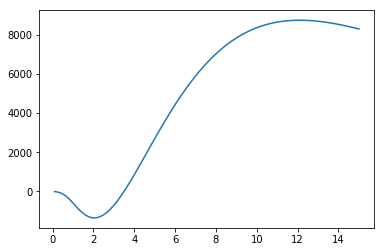

In [7]:
array_result = np.array(Integral_ISM_res)
const = -4.*G*Sigma_g_ISM_I
plt.plot(R,const*array_result/(2.*R_d_I))

In [8]:
def Vc2_ISM(R,R_g,R_m,Sigma_g):
    def Integral_ISM(h,s,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/R_g - R_m/(R*h*s))
        t4 = (R_m*R_g)/(R**2.*h**2.) - s**2.
        result = t1*t2*t3*t4
        return R**2.*result
    Integral_ISM_res = []
    for i in range (0,len(R)):
        integrando = lambda h,s: Integral_ISM(h,s,R[i])
        resultado = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
        Integral_ISM_res.append(resultado)
    return -4.*G*np.pi*Sigma_g*np.array(Integral_ISM_res)/R_g

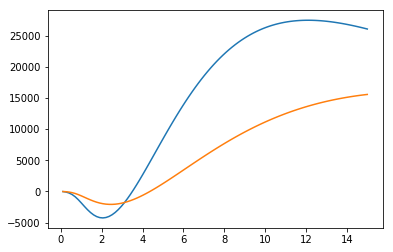

In [9]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_I,R_m=R_m,Sigma_g=Sigma_g_ISM_I))
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II))

In [10]:
%timeit Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II)

1 loop, best of 3: 5min 36s per loop


In [11]:
def Vc2_ISM_aprox(R,R_g,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(R_g))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

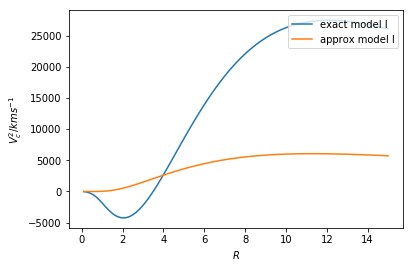

In [12]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_I,R_m=R_m,Sigma_g=Sigma_g_ISM_I),label='exact model I')
plt.plot(R,Vc2_ISM_aprox(R,R_g=2.*R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m),label='approx model I')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}^{2}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [14]:
dif_I = (Vc2_ISM_aprox(R,R_g=2.*R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m) - Vc2_ISM(R,R_g=2.*R_d_I,R_m=R_m,Sigma_g=Sigma_g_ISM_I))
print (dif_I/Vc2_ISM(R,R_g=2.*R_d_I,R_m=R_m,Sigma_g=Sigma_g_ISM_I))*100.

[-100.         -100.0000207  -100.00708624 -100.0905811  -100.36190469
 -100.85997558 -101.57072546 -102.47806274 -103.58073699 -104.89390135
 -106.4490387  -108.29604155 -110.50864715 -113.19477282 -116.51503425
 -120.71652758 -126.19779505 -133.64384699 -144.33801346 -160.99560836
 -190.53128007 -257.28932455 -551.51536204  578.96716629  109.37402863
   28.99720867   -4.27706232  -22.46857502  -33.93583547  -41.82388187
  -47.58071038  -51.9658578   -55.41609984  -58.20043176  -60.49357388
  -62.4139467   -64.04465851  -65.44575595  -66.66170564  -67.72614054
  -68.66497092  -69.49848155  -70.24278061  -70.91082279  -71.51314562
  -72.05840868  -72.55379469  -73.00531188  -73.41802515  -73.79623451
  -74.14361466  -74.46332493  -74.75809694  -75.03030479  -75.28202207
  -75.51506806  -75.73104591  -75.93137388  -76.11731154  -76.28998156
  -76.4503877   -76.59943087  -76.73792157  -76.8665914   -76.98610247
  -77.09705561  -77.19999745  -77.29542647  -77.38379832  -77.46553045
  -77.

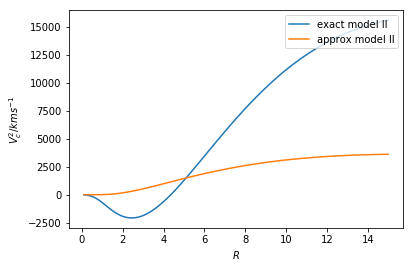

In [15]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II),label='exact model II')
plt.plot(R,Vc2_ISM_aprox(R,R_g=2.*R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m),label='approx model II')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}^{2}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [16]:
dif_II = (Vc2_ISM_aprox(R,R_g=2.*R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m) - Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II))
print (dif_II/Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II))*100.

[ -100.          -100.00001521  -100.00531119  -100.06951449
  -100.28376303  -100.68399488  -101.25721411  -101.98215692
  -102.84558142  -103.84414632  -104.98305071  -106.27495369
  -107.73980631  -109.40562457  -111.31025573  -113.50437258
  -116.05620959  -119.05900305  -122.64290071  -126.99466212
  -132.39170326  -139.26425696  -148.31698067  -160.78884043
  -179.07752001  -208.50677954  -263.74895292  -405.40102357
 -1566.08955961   488.17057093   156.55899239    68.57954357
    27.86319501     4.38342643   -10.89619963   -21.6349197
   -29.59649403   -35.73580929   -40.61487976   -44.58605563
   -47.88145523   -50.6602187    -53.03509988   -55.08822043
   -56.88081182   -58.45946164   -59.86024519   -61.11153294
   -62.2359439    -63.25173335   -64.17379724   -65.01441142
   -65.78378382   -66.49047264   -67.14170702   -67.74363566
   -68.30152167   -68.81989667   -69.30268383   -69.75329684
   -70.1747202    -70.56957473   -70.94017151   -71.28855643
   -71.61654725   -71.925

In [17]:
def Integral_ISM_test(s,h,R,R_g=2.*R_d_I,R_m=R_m):
    t1 = 1./np.sqrt(1.-s**2.)
    t2 = 1./np.sqrt(h**2. - 1.)
    t3 = np.exp(-(R*s*h)/R_g - R_m/(R*h*s))
    t4 = (R_m*R_g)/(R**2.*h**2.) - s**2.
    result = t1*t2*t3*t4
    return R**2.*result

In [53]:
print Integral_ISM_test(s_lims,h_lims,R)

[ 0.00000000e+000  0.00000000e+000  4.85513071e-154  8.71997647e-066
  9.09739617e-035  6.64742294e-021  9.44360066e-014  1.08348643e-009
  3.16034382e-007  1.17888836e-005  1.28802841e-004  6.50167983e-004
  1.97575472e-003  4.24335562e-003  7.12024092e-003  9.94855237e-003
  1.20486136e-002  1.29482145e-002  1.24634514e-002  1.06684319e-002
  7.81560125e-003  4.25064607e-003  3.42778038e-004 -3.56418132e-003
 -7.18176358e-003 -1.02919725e-002 -1.27516183e-002 -1.44891474e-002
 -1.54964469e-002 -1.58175042e-002 -1.55354109e-002 -1.47589407e-002
 -1.36097329e-002 -1.22109198e-002 -1.06778164e-002 -9.11104867e-003
 -7.59224311e-003 -6.18215660e-003 -4.92092585e-003 -3.82997153e-003
 -2.91502084e-003 -2.16971005e-003 -1.57928721e-003 -1.12403629e-003
 -7.82166771e-004 -5.32036562e-004 -3.53684537e-004 -2.29731718e-004
 -1.45761973e-004 -9.03162277e-005 -5.46334391e-005 -3.22544371e-005
 -1.85789202e-005 -1.04378026e-005 -5.71753827e-006 -3.05260786e-006
 -1.58797134e-006 -8.04580278e-007

In [335]:
s_lims = np.linspace(0.0001,0.999,100)
h_lims = np.linspace(1.001,10.0,600)
fun_s = np.zeros(len(s_lims))

In [336]:
Integral_ISM_sims = []
for k in range(0,len(R)):
    for i in range(0,len(s_lims)):
        fun_s[i] = integrate.simps(Integral_ISM_test(s_lims[i],h_lims,R[k]),h_lims)#, axis=-1, even='avg')
        #print fun_s[i]
    result = integrate.simps(fun_s,s_lims)#, axis=-1, even='avg')
    Integral_ISM_sims.append(result)
print Integral_ISM_sims

[0.00036194437661916907, 0.012975134424000388, 0.04271848990681764, 0.08703254316237619, 0.14693453150519703, 0.2209329455970223, 0.30389796251045803, 0.38909339497526085, 0.47005578955112987, 0.5415366323961713, 0.5997524212407407, 0.6422823585918254, 0.6678332736956738, 0.675983265699244, 0.666951291519217, 0.6414074864373501, 0.6003244851126823, 0.5448644805541846, 0.47629537893160806, 0.3959297617257394, 0.3050813163994835, 0.20503444215669697, 0.09702368147530974, -0.017779588094688277, -0.13827514451260103, -0.26343805406533316, -0.39232003760034223, -0.5240488823576829, -0.6578265016405982, -0.7929260871249557, -0.9286886808009388, -1.0645194055195621, -1.199883527429007, -1.334302474624619, -1.4673498998978065, -1.5986478484065187, -1.727863071049216, -1.8547035095436246, -1.9789149683717246, -2.1002779808643517, -2.2186048710204074, -2.3337370086291647, -2.445542252470539, -2.553912574491503, -2.6587618566597233, -2.760023851498743, -2.8576502969779805, -2.951609176363917, -3.

Text(0.5,1,'Model I')

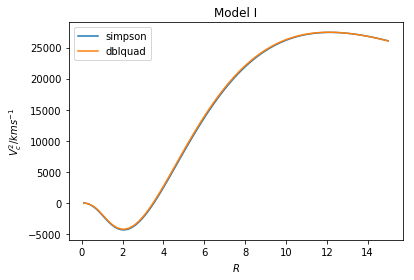

In [337]:
array_result_sims = np.array(Integral_ISM_sims)
plt.plot(R,const*array_result_sims/(2.*R_d_I),label='simpson')
plt.plot(R,const*array_result/(2.*R_d_I),label='dblquad')
#plt.plot(R,(dif_sims_quad/const*array_result/(2.*R_d_I)),label='dif')
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}^{2}/km s^{-1}$')
plt.legend(loc='upper left', prop={'size':10})
plt.title('Model I')

In [239]:
dif_sims_quad = const*array_result_sims/(2.*R_d_I) - const*array_result/(2.*R_d_I)
print (dif_sims_quad/const*array_result/(2.*R_d_I))*100.

[-2.55756057e-05 -1.35359330e-04  9.00872198e-04  4.02437988e-03
  8.84531008e-03  1.40459264e-02  1.84784669e-02  2.20791402e-02
  2.58356743e-02  3.11316275e-02  3.90610369e-02  5.00201924e-02
  6.36060300e-02  7.87279130e-02  9.38238283e-02  1.07099043e-01
  1.16738964e-01  1.21074552e-01  1.18695660e-01  1.08516987e-01
  8.98052718e-02  6.21772807e-02  2.55773903e-02 -1.97578367e-02
 -7.33422727e-02 -1.34485689e-01 -2.02338973e-01 -2.75937003e-01
 -3.54237893e-01 -4.36157844e-01 -5.20601348e-01 -6.06486622e-01
 -6.92766702e-01 -7.78446121e-01 -8.62593921e-01 -9.44353204e-01
 -1.02294771e+00 -1.09768579e+00 -1.16796227e+00 -1.23325844e+00
 -1.29314047e+00 -1.34725686e+00 -1.39533465e+00 -1.43717518e+00
 -1.47264914e+00 -1.50169142e+00 -1.52429567e+00 -1.54050874e+00
 -1.55042525e+00 -1.55418218e+00 -1.55195360e+00 -1.54394562e+00
 -1.53039165e+00 -1.51154781e+00 -1.48768876e+00 -1.45910372e+00
 -1.42609286e+00 -1.38896399e+00 -1.34802952e+00 -1.30360402e+00
 -1.25600048e+00 -1.20553

In [338]:
def Vc2_ISM_sims(R,Sigma_g_ISM,R_g,R_m):
    def Integral_ISM(s,h,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/R_g - R_m/(R*h*s))
        t4 = (R_m*R_g)/(R**2.*h**2.) - s**2.
        result = t1*t2*t3*t4
        return R**2.*result
    s_lims = np.linspace(0.0001,0.999,len(R))#100
    h_lims = np.linspace(1.001,10.0,6*len(R))#600
    fun_s = np.zeros(len(s_lims))
    Integral_ISM_sims = []
    for k in range(0,len(R)):
        for i in range(0,len(s_lims)):
            fun_s[i] = integrate.simps(Integral_ISM(s_lims[i],h_lims,R[k]),h_lims)
        result = integrate.simps(fun_s,s_lims)
        Integral_ISM_sims.append(result)
    return -4.*np.pi*G*Sigma_g_ISM*np.array(Integral_ISM_sims)/R_g

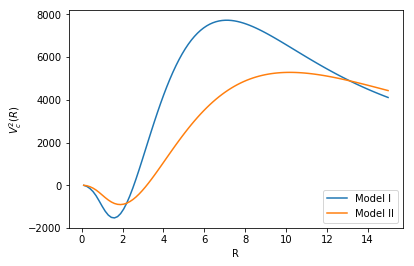

In [342]:
plt.plot(R,Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_I,R_g=R_d_I,R_m=R_m),label='Model I')
plt.plot(R,Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_II,R_g=R_d_II,R_m=R_m),label='Model II')
plt.xlabel('R')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.legend(loc='lower right', prop={'size':10})

In [339]:
%timeit Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_I,R_g=2.*R_d_I,R_m=R_m)

1 loop, best of 3: 6.64 s per loop


In [340]:
%timeit Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_II,R_g=2.*R_d_II,R_m=R_m)

1 loop, best of 3: 6.59 s per loop
